In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100)
X[:4]

array([0.6475812 , 0.11110373, 0.63414378, 0.39488734])

In [3]:
y = 5.5 * X + 4.5
y[:4]

array([8.06169657, 5.11107051, 7.98779078, 6.67188035])

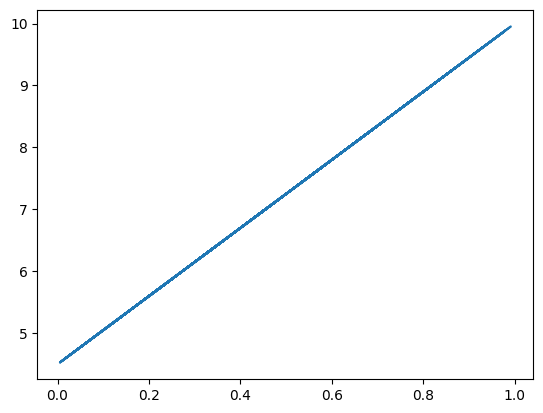

In [4]:
plt.plot(X, y)

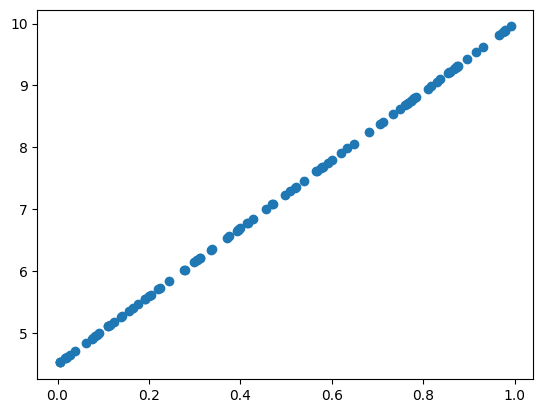

In [5]:
plt.scatter(X, y)

In [6]:
noise = np.random.normal(0, 0.1, 100)
y = 5.5 * X + 4.5 + noise
y[:4]

array([8.27462586, 5.04690184, 7.84125461, 6.71341825])

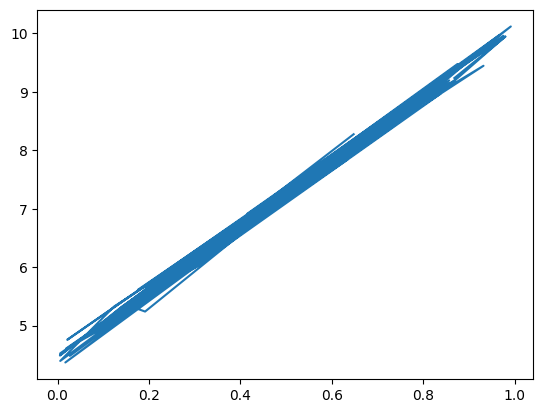

In [7]:
plt.plot(X, y)

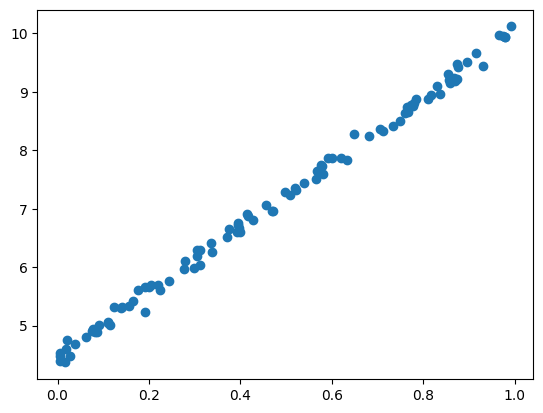

In [8]:
plt.scatter(X, y)

In [9]:
X = np.random.rand(100)
noise = np.random.normal(0, .1, 100)
y = 5.5 * X + 4.5 + noise
X = X.reshape(-1, 1)
X.shape

(100, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
model.coef_, model.intercept_

(array([5.44653584]), 4.524996773355118)

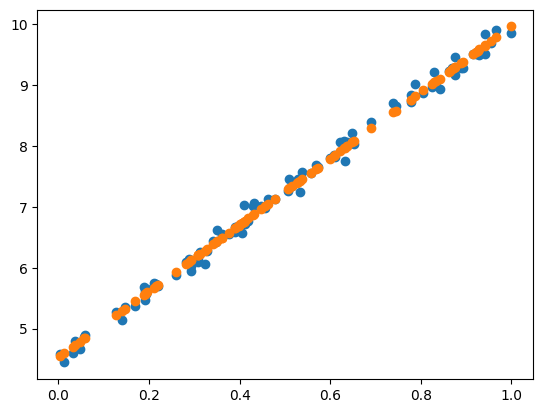

In [13]:
plt.scatter(X, y)
plt.scatter(X, model.predict(X))

### Linear Regression from Scratch

{'b': 5.619607511685285, 'w': 3.286784604711904}


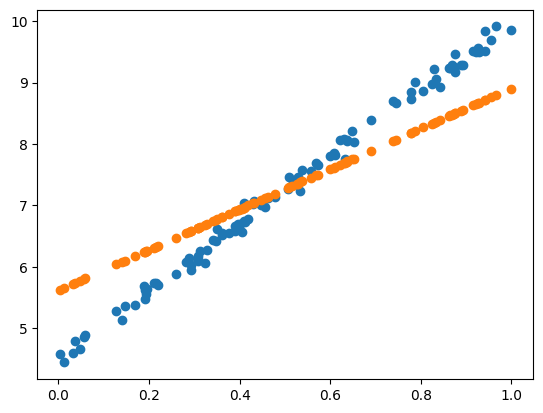

In [15]:
class myLinearRegressionModel:
    
    def __init__(self):
        self.params = {}
        self.params['b'] = np.random.rand()
        self.params['w'] = np.random.rand()

    def predict(self, X):
        y_hat = self.params['w'] * X + self.params['b']
        y_hat = y_hat.flatten()
        return y_hat
        
    def calculateGradient(self, X, y, y_hat):
        dw = np.mean((y_hat - y) * X)
        db = np.mean(y_hat - y)

        derivative = {
            'dw' : dw,
            'db' : db
        }

        return derivative
    

    def loss(self, y, y_hat):
        return np.mean((y - y_hat) ** 2)


    def fit(self, X, y, epochs=100, lr=0.1):
        
        self.stats = {
            'epochs' : [],
            'loss' : []
        }

        for epoch in range(epochs):
            # print(f'In {epoch} th epoch')
            y_hat = self.predict(X)
            derivative = self.calculateGradient(X, y, y_hat)
            self.params['w'] = self.params['w'] - lr * derivative['dw']
            self.params['b'] = self.params['b'] - lr * derivative['db']
        
        _loss = self.loss(y, y_hat)
        # print(f'epoch: {epoch}; loss: {_loss}')
        self.stats['epochs'].append(epoch)
        self.stats['loss'].append(_loss)
    
    # plt.plot(self.stats['epochs'], self.stats['loss'])
    # plt.xlabel('epoch count')
    # plt.ylabel('loss')
    # plt.show()

myModel = myLinearRegressionModel()

# print(myModel.params)

# y_hat = myModel.predict(np.array([
#     [1],
#     [2]
# ]))

# y_hat

# myModel.fit(X, y)
# myModel.predict(X)

myModel.fit(X, y, epochs=10000 ,lr=0.1)
print(myModel.params)

plt.scatter(X, y)
plt.scatter(X, myModel.predict(X))

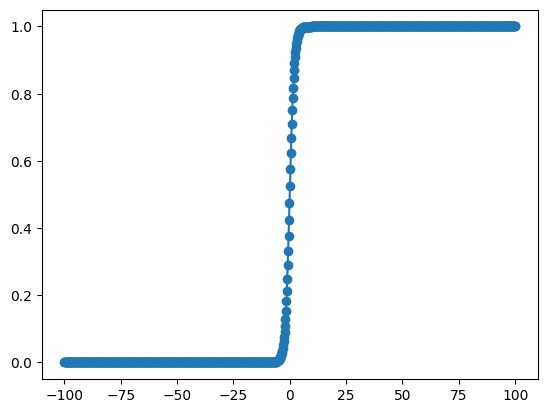

In [16]:
X = np.linspace(-100, 100, 1000)
y = 1 / (1 + np.exp(- X))

plt.plot(X, y)
plt.scatter(X, y)

In [17]:
from sklearn.linear_model import LogisticRegression

lgModel = LogisticRegression()
lgModel.fit(X_train, y_train)
lgModel.predict(X_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.